# Instalando investpy

In [1]:
! pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 12.5 MB/s 
     |████████████████████████████████| 235 kB 30.8 MB/s 
     |████████████████████████████████| 6.4 MB 40.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=58a37daa43ccd2e94a43c702b6935a2adc1197173b5763f2e0946be07df77c63
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy

# 1. Ações

In [3]:
search_results = investpy.search_quotes(text = 'PETRO', products= ['stocks'], countries= ['brazil'], n_results = 50)

In [4]:
# pegar o item 1 não incluindo o item 2
for search_result in search_results[1:2]:
  print(search_result)

{"id_": 18750, "name": "Petroleo Brasileiro SA PN", "symbol": "PETR4", "country": "brazil", "tag": "/equities/petrobras-pn", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [6]:
petr = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

In [10]:
# OHLC: Open, High, Low, Close
petr.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,30.51,30.70,30.31,30.70,37774500,1.72
2020-01-03,30.88,31.24,30.45,30.45,71595600,-0.81
2020-01-06,30.43,30.94,29.95,30.81,81844000,1.18
2020-01-07,30.82,30.88,30.47,30.69,32822000,-0.39
2020-01-08,30.69,30.77,30.24,30.50,48215600,-0.62


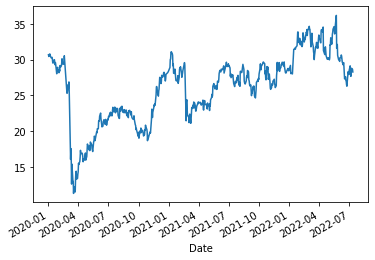

In [8]:
petr['Close'].plot()

In [24]:
search_results = investpy.search_quotes(text = 'magazine', products= ['stocks'], countries= ['brazil'], n_results = 50)

for search_result in search_results:
  print(search_result)

{"id_": 18729, "name": "Magazine Luiza SA", "symbol": "MGLU3", "country": "brazil", "tag": "/equities/magaz-luiza-on-nm", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [27]:
mglu = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

In [28]:
mglu

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,5162711,2.53
2020-01-03,118564.0,118792.0,117341.0,117707.0,6834513,-0.73
2020-01-06,117707.0,117707.0,116269.0,116878.0,6569978,-0.70
2020-01-07,116872.0,117076.0,115965.0,116662.0,4854136,-0.18
2020-01-08,116667.0,117335.0,115693.0,116247.0,5910454,-0.36
...,...,...,...,...,...,...
2022-07-06,98294.0,99141.0,97423.0,98719.0,13348183,0.43
2022-07-07,98722.0,101420.0,98722.0,100730.0,12696250,2.04
2022-07-08,100732.0,101577.0,99958.0,100289.0,9730424,-0.44


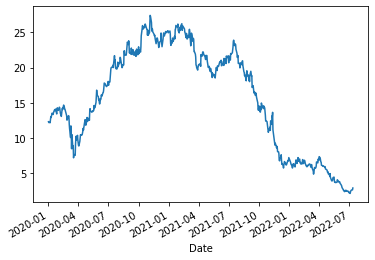

In [19]:
mglu['Close'].plot();

#2. Índices

In [25]:
search_results = investpy.search_quotes(text = 'bvsp', products= ['indices'], countries= ['brazil'], n_results = 50)

for search_result in search_results[0:1]:
  print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [26]:
ibov = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

In [29]:
ibov

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,5162711,2.53
2020-01-03,118564.0,118792.0,117341.0,117707.0,6834513,-0.73
2020-01-06,117707.0,117707.0,116269.0,116878.0,6569978,-0.70
2020-01-07,116872.0,117076.0,115965.0,116662.0,4854136,-0.18
2020-01-08,116667.0,117335.0,115693.0,116247.0,5910454,-0.36
...,...,...,...,...,...,...
2022-07-06,98294.0,99141.0,97423.0,98719.0,13348183,0.43
2022-07-07,98722.0,101420.0,98722.0,100730.0,12696250,2.04
2022-07-08,100732.0,101577.0,99958.0,100289.0,9730424,-0.44


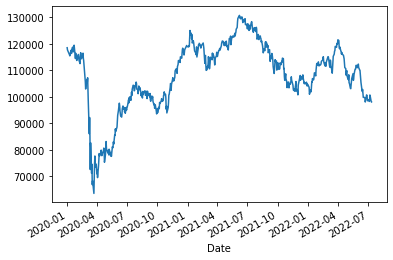

In [30]:
ibov['Close'].plot()

#3. ETFS

In [33]:
#bova11
bova11 = investpy.get_etf_historical_data(etf='Ishares Ibovespa',country='Brazil',from_date='01/01/2020',to_date='12/07/2022')

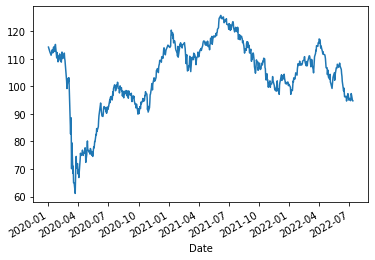

In [34]:
bova11['Close'].plot() 

In [39]:
gold = investpy.get_etf_historical_data(etf='SPDR Gold Shares',country='united states',from_date='01/01/2020',to_date='12/07/2022')



In [40]:
gold

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2020-01-02,143.86,144.21,143.40,143.95,7736828,USD,NYSE
2020-01-03,145.75,146.32,145.40,145.86,12285501,USD,NYSE
2020-01-06,148.44,148.48,146.95,147.39,14409912,USD,NYSE
2020-01-07,147.57,148.14,147.43,147.97,8401088,USD,NYSE
2020-01-08,148.49,148.61,146.14,146.86,22276324,USD,NYSE
...,...,...,...,...,...,...,...
2022-07-06,164.32,164.57,161.47,162.14,11781469,USD,NYSE
2022-07-07,162.43,163.04,162.06,162.23,4575439,USD,NYSE
2022-07-08,162.35,163.38,161.84,162.30,4584112,USD,NYSE


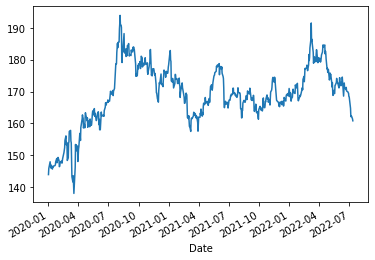

In [42]:
gold['Close'].plot()

In [46]:
#etf brazileiro na bolsa americana

search_results = investpy.search_quotes(text = 'ewz', products= ['etfs'], countries= ['united states'], n_results = 50)

for search_result in search_results[0:1]:
  print(search_result)

{"id_": 509, "name": "iShares MSCI Brazil ETF", "symbol": "EWZ", "country": "united states", "tag": "/etfs/ishares-brazil-index", "pair_type": "etfs", "exchange": "NYSE"}


In [48]:
ewz = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

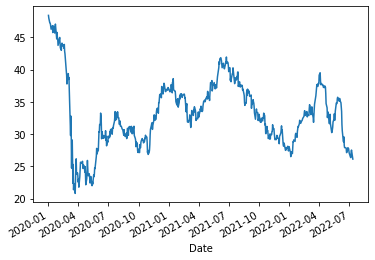

In [49]:
ewz['Close'].plot()

# 4. Commodities

In [50]:
search_results = investpy.search_quotes(text = 'soy', products= ['commodities'], countries= ['brazil'], n_results = 50)

for search_result in search_results:
  print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [52]:
soja_br = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

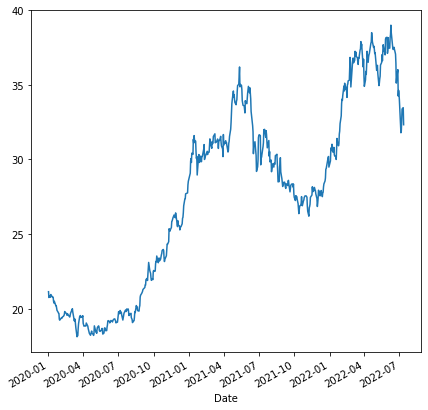

In [53]:
soja_br['Close'].plot(figsize = (7,7))

In [60]:
search_results = investpy.search_quotes(text = 'corn', products= ['commodities'], countries= ['brazil'], n_results = 50)

for search_result in search_results[2:3]:
  print(search_result)

{"id_": 964522, "name": "US Corn Futures", "symbol": "CCMc1", "country": null, "tag": "/commodities/us-corn?cid=964522", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [61]:
milho_br = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

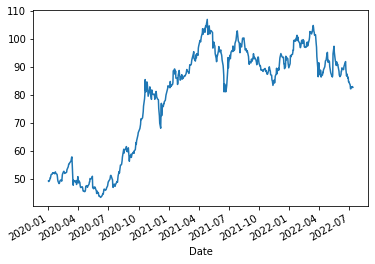

In [62]:
milho_br['Close'].plot()

In [64]:
search_results = investpy.search_quotes(text = 'cattle', products= ['commodities'], countries= ['brazil'], n_results = 50)

for search_result in search_results[0:1]:
  print(search_result)

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": null, "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [65]:
boi_gordo = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

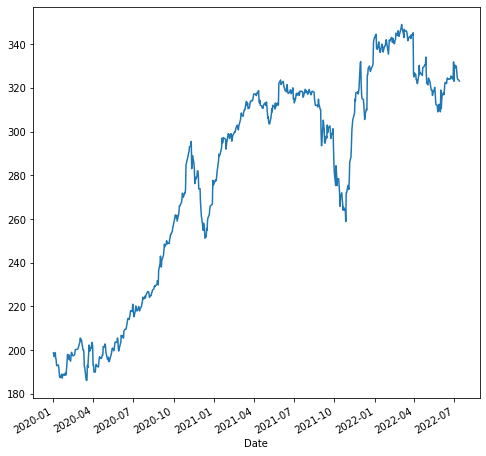

In [67]:
boi_gordo['Close'].plot(figsize= (8,8))

In [69]:
search_results = investpy.search_quotes(text = 'lumber', products= ['commodities'], countries= ['united states'], n_results = 50)

for search_result in search_results[0:1]:
  print(search_result)

{"id_": 959198, "name": "Lumber Futures", "symbol": "LBc1", "country": null, "tag": "/commodities/lumber", "pair_type": "commodities", "exchange": "CME"}


In [70]:
lumber = search_result.retrieve_historical_data(from_date = '01/01/2020', to_date = '12/07/2022')

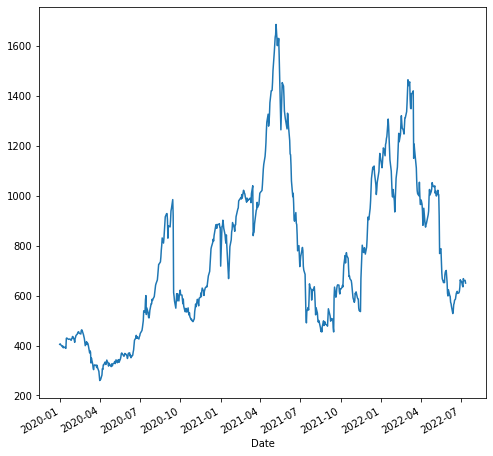

In [71]:
lumber['Close'].plot(figsize= (8,8))

# 5. Criptomoedas

In [109]:
dogecoin = investpy.get_crypto_historical_data(crypto = 'dogecoin', from_date= '01/01/2020', to_date='12/07/2022')

In [110]:
dogecoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-01,0.002015,0.002056,0.002004,0.002040,1438402432,USD
2020-01-02,0.002040,0.002051,0.001991,0.001999,1863567232,USD
2020-01-03,0.001999,0.002265,0.001989,0.002042,1693032448,USD
2020-01-04,0.002042,0.002318,0.002041,0.002307,1545883008,USD
2020-01-05,0.002307,0.002336,0.002076,0.002080,1568643072,USD


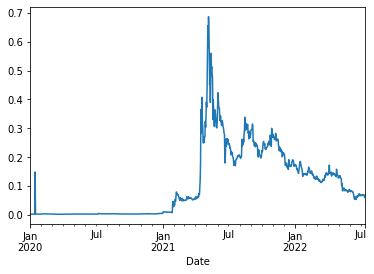

In [111]:
dogecoin['Close'].plot()

# 6. Tesouro Direto

In [ ]:
search_results = investpy.search_quotes(text = 'tesouro', products= ['bonds'], countries= ['brazil'], n_results = 50)

for search_result in search_results[6:7]:
  print(search_result)

In [112]:
ipca_2045 = search_result.retrieve_historical_data(from_date = '01/01/2019', to_date = '01/07/2022')

In [113]:
ipca_2045

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2019-01-02,331.5,331.9,328.0,329.0,210,-1.05
2019-01-03,330.7,335.0,322.4,326.3,216,-0.82
2019-01-04,325.6,326.0,323.1,323.6,52,-0.83
2019-01-07,326.2,326.2,323.0,324.8,101,0.37
2019-01-08,324.2,331.7,321.3,326.5,205,0.52
...,...,...,...,...,...,...
2022-06-27,603.1,617.5,603.1,611.0,94,0.39
2022-06-28,602.8,630.5,602.5,617.6,164,1.08
2022-06-29,628.0,642.5,624.2,633.6,168,2.59


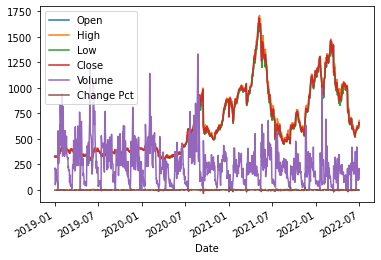

In [114]:
ipca_2045.plot()